## Fitting the spectrum of the events

In this notebook, we will compute the spectrum of all the events with the Welch method and fit two segments in the spectrum to extract features.

In [1]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt 

import analysis
import catalog
import figures

tqdm.pandas()
catalog.display_parameters()

## Load the catalog

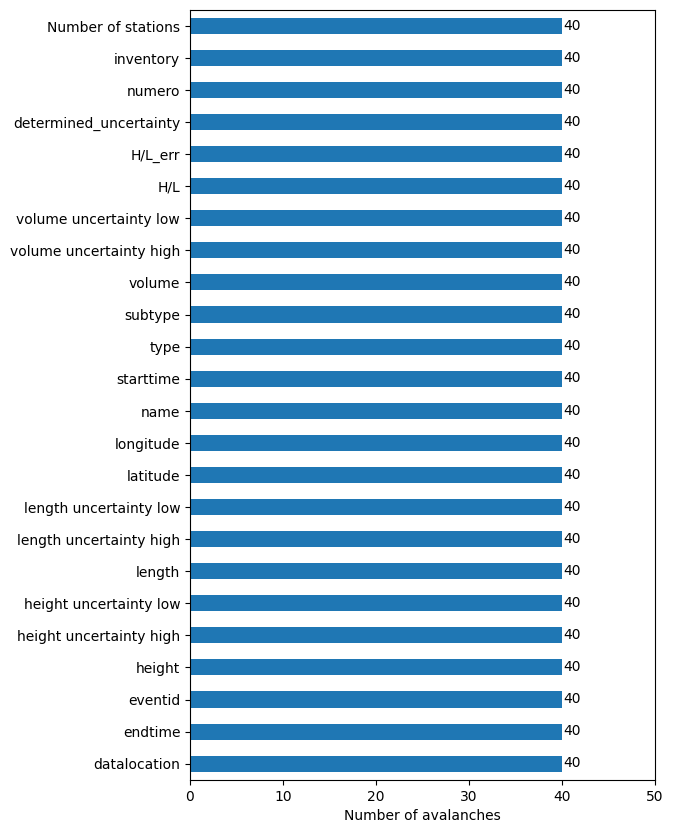

In [2]:
ESEC_avalanches = catalog.load("catalog/7_ESEC_avalanches_40.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.11, xlim=50)

## Spectrum of all events

  0%|          | 0/40 [00:00<?, ?it/s]

-------------------------
Event number 0
-------------------------
The distance of the trace is 48.81039753705775
Detection on trace 0


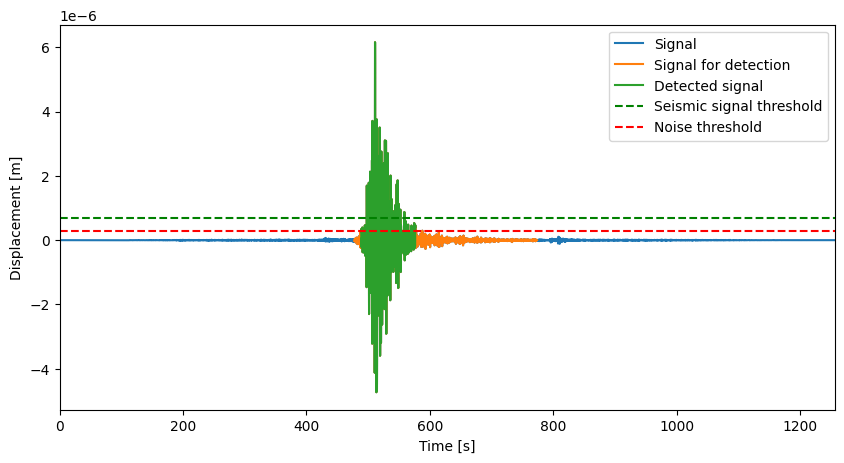

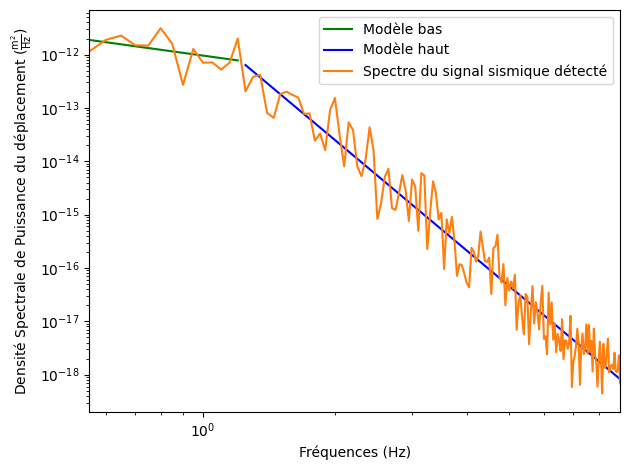

-------------------------
Event number 2
-------------------------
The distance of the trace is 17.706438612134626
Detection on trace 0


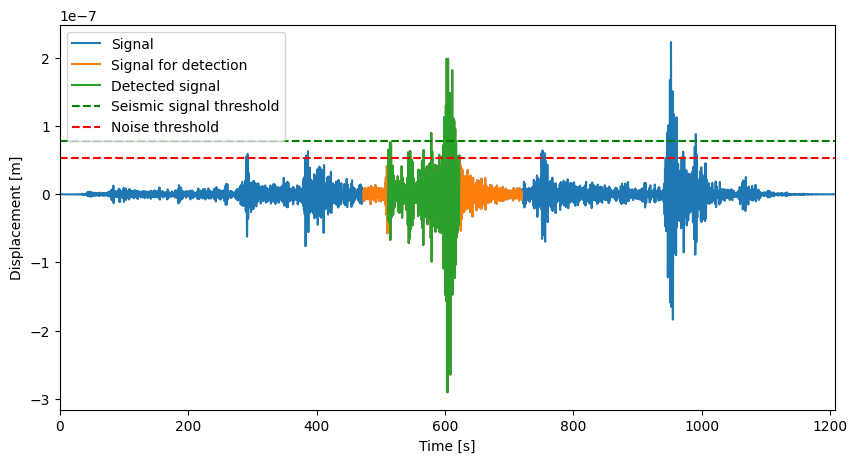

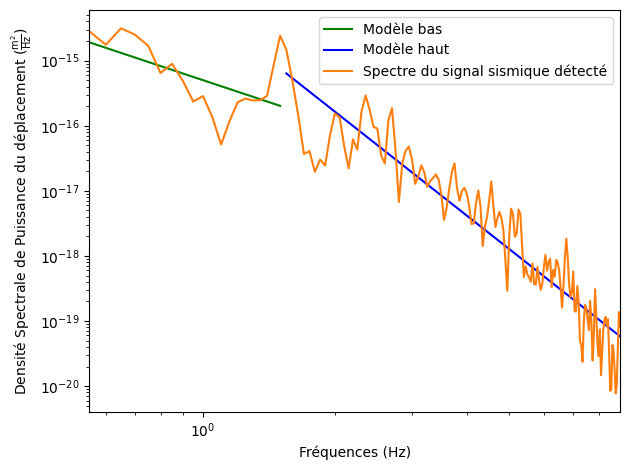

-------------------------
Event number 3
-------------------------
The distance of the trace is 67.24607360705616
Detection on trace 0


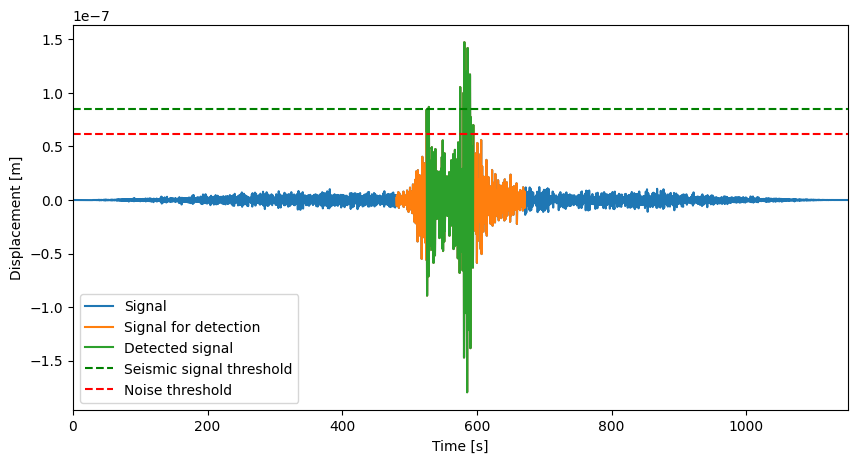

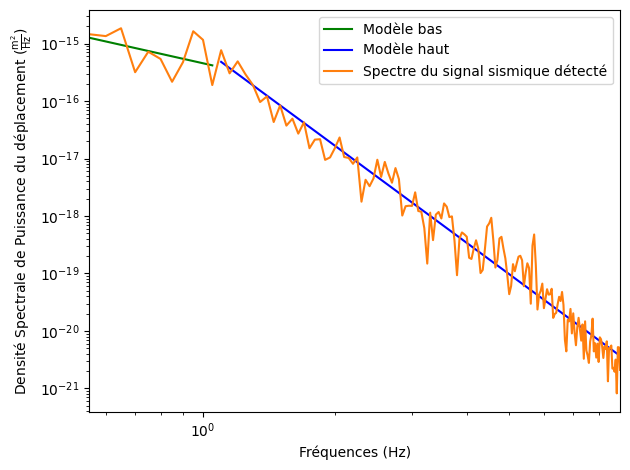

-------------------------
Event number 5
-------------------------
The distance of the trace is 41.30901063049271
Detection on trace 0


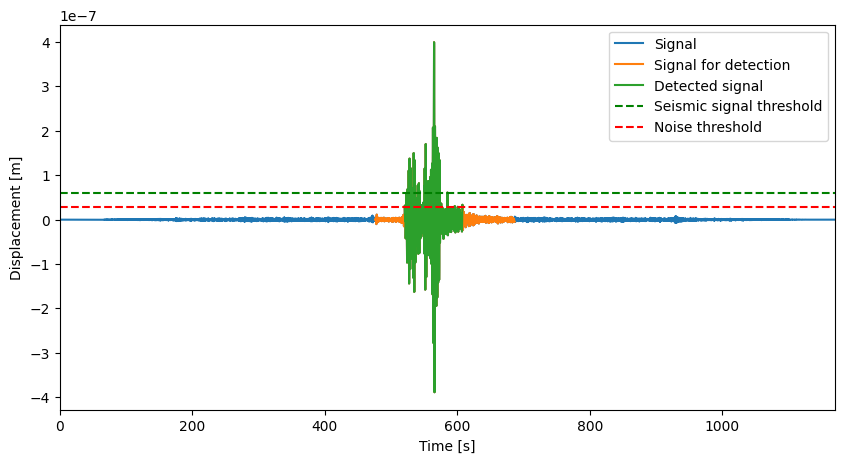

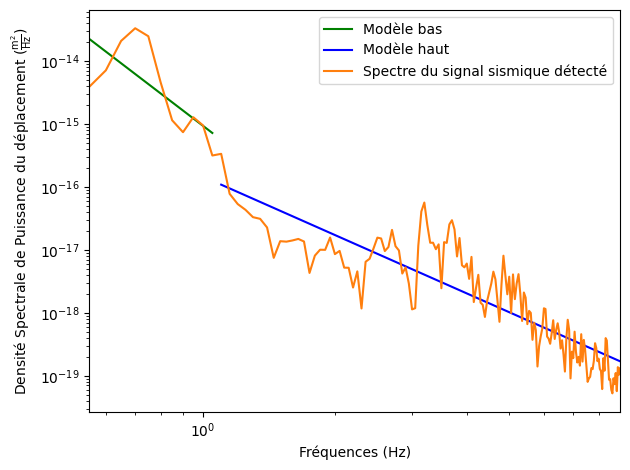

-------------------------
Event number 6
-------------------------
The distance of the trace is 156.3475108523247
Detection on trace 0


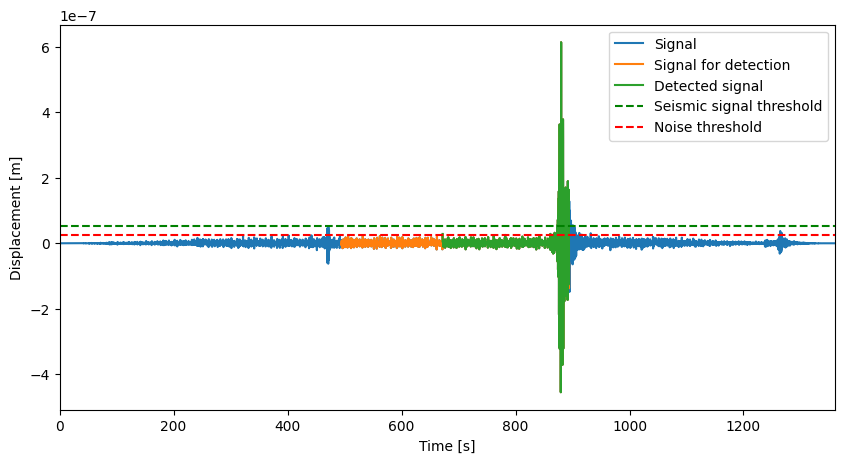

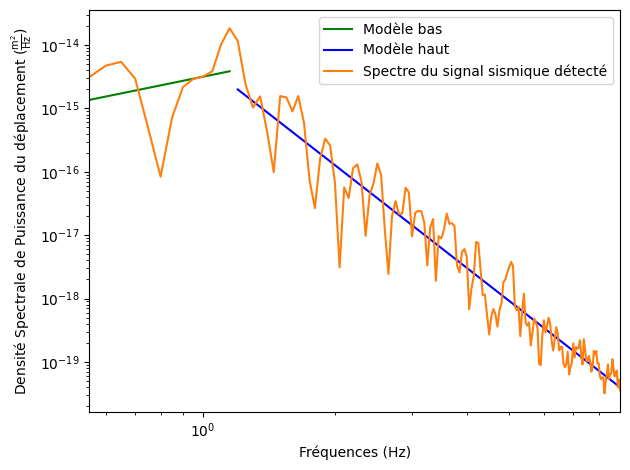

-------------------------
Event number 8
-------------------------
The distance of the trace is 80.84173760387873
Detection on trace 0


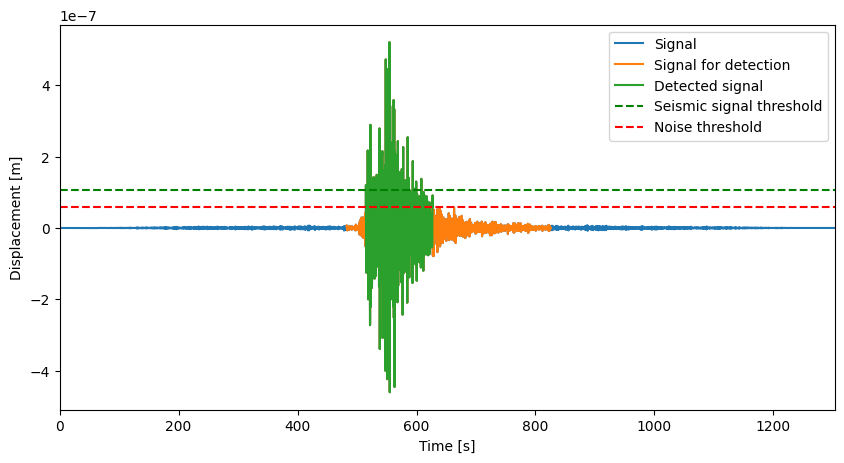

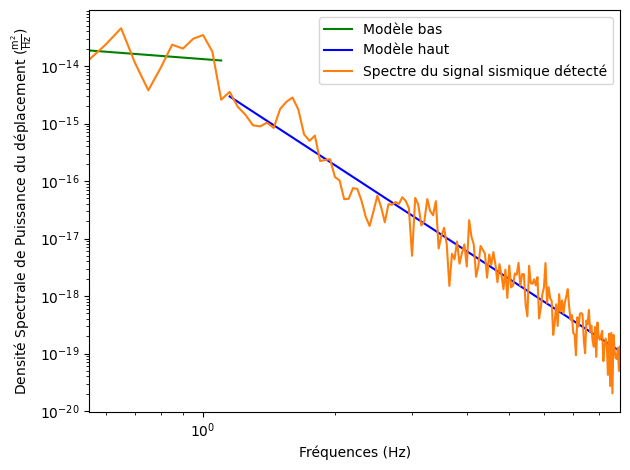

-------------------------
Event number 9
-------------------------
The distance of the trace is 63.49445548122539
Detection on trace 0


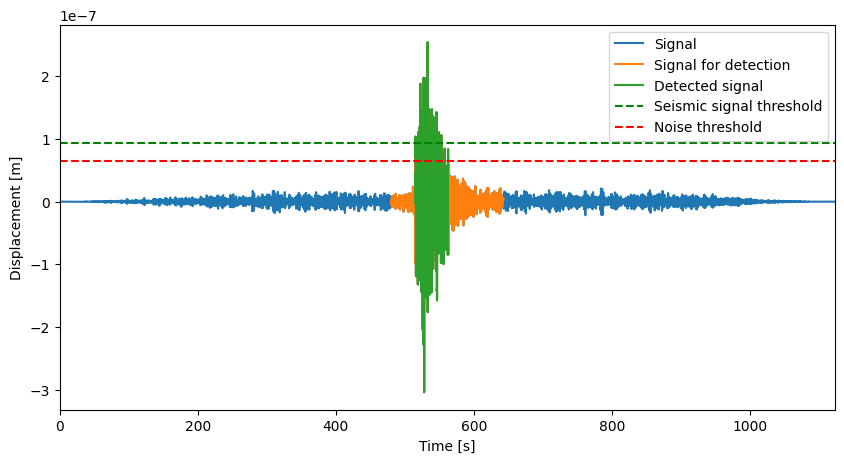

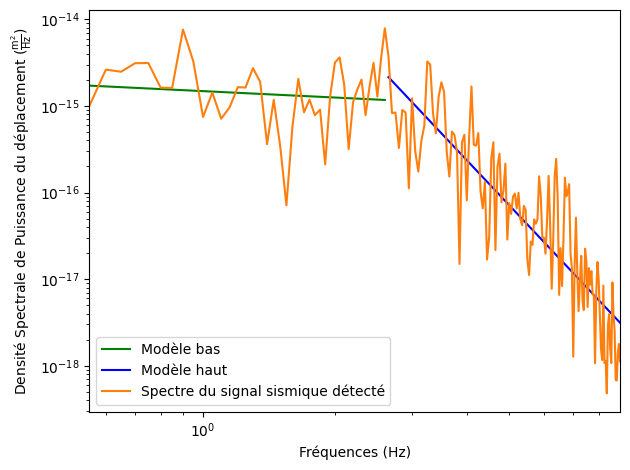

-------------------------
Event number 10
-------------------------
The distance of the trace is 6.713114336267443
Detection on trace 0


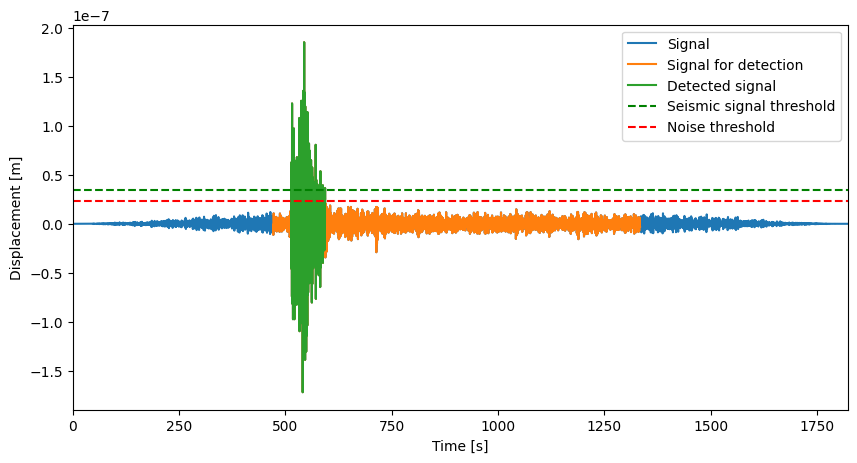

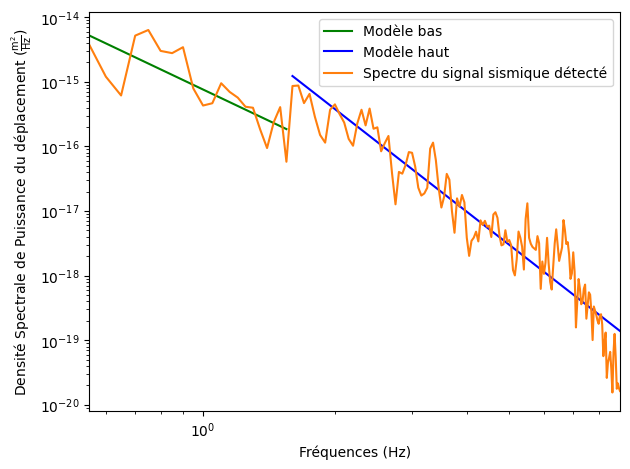

-------------------------
Event number 11
-------------------------
The distance of the trace is 5.755487205375801
Detection on trace 0


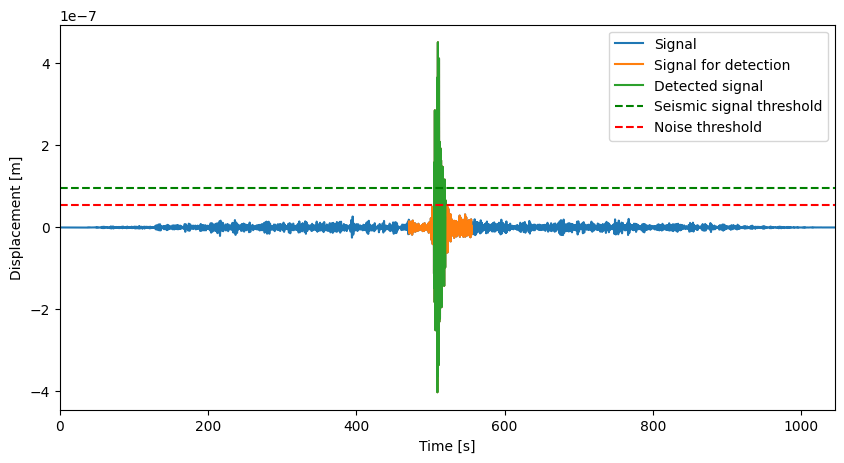

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 771, using nperseg = 771
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


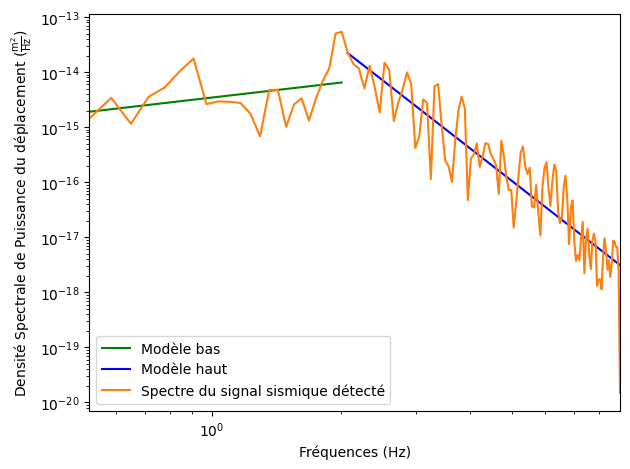

-------------------------
Event number 21
-------------------------
The distance of the trace is 71.8558083991807
Detection on trace 0


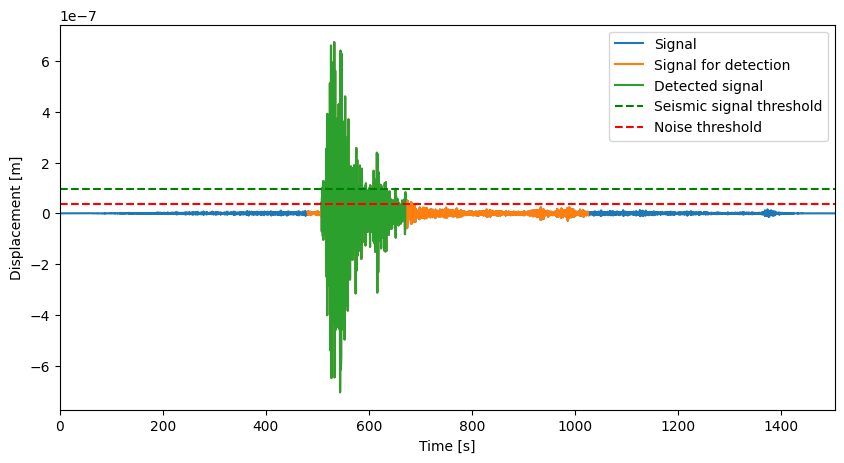

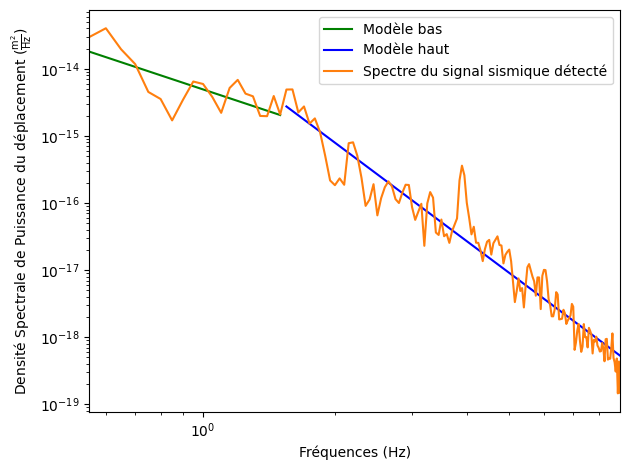

-------------------------
Event number 22
-------------------------
The distance of the trace is 6.338558874564575
Detection on trace 0


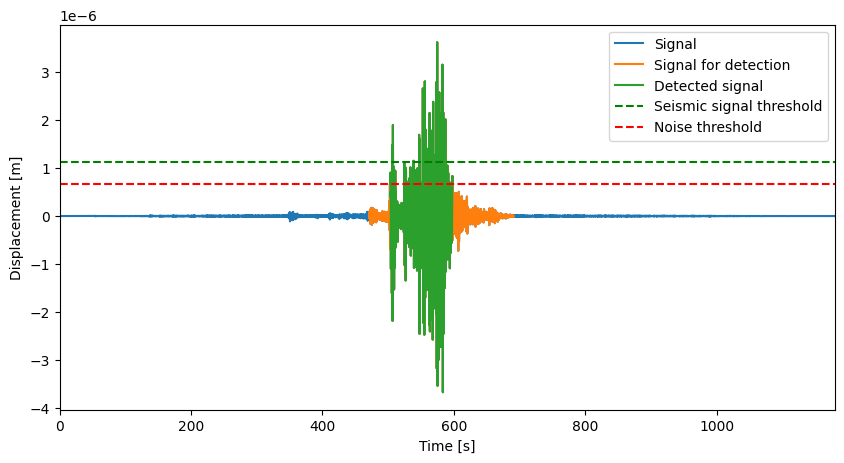

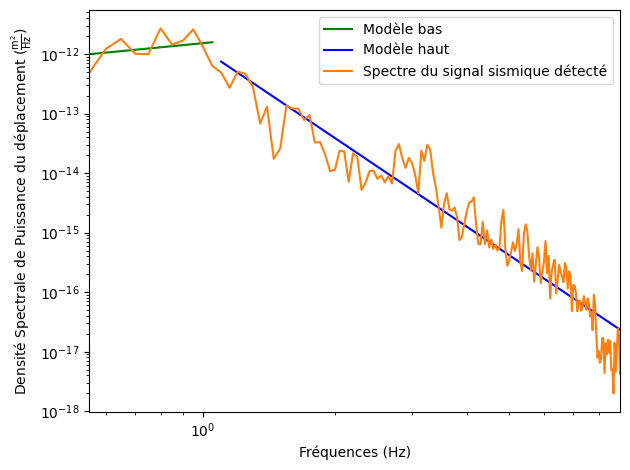

-------------------------
Event number 23
-------------------------
The distance of the trace is 50.68000097637431
Detection on trace 0


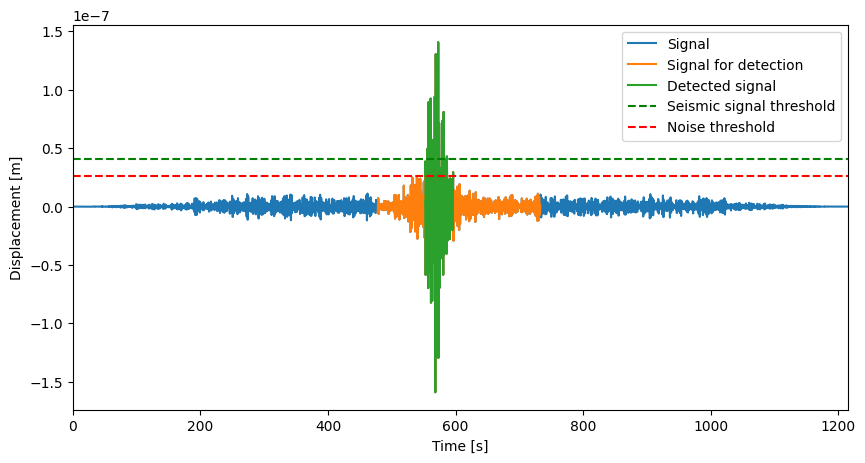

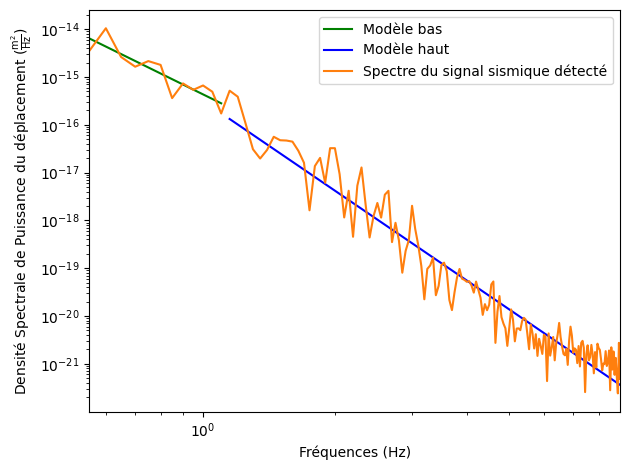

-------------------------
Event number 24
-------------------------
The distance of the trace is 18.18161655717009
Detection on trace 0


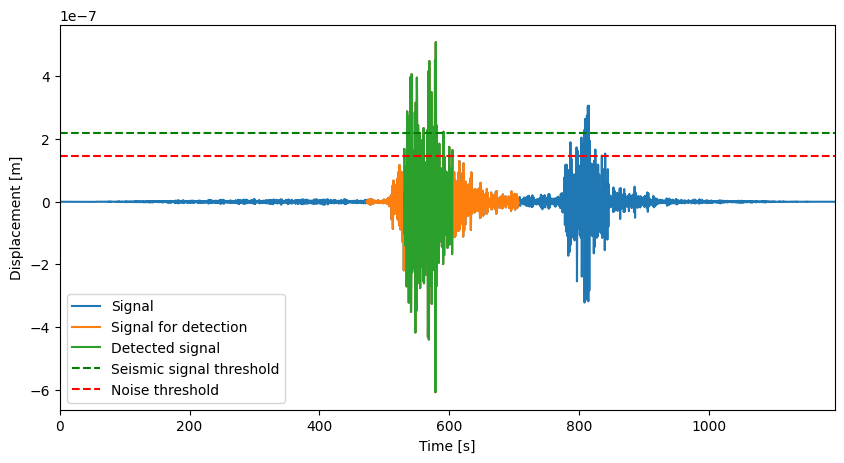

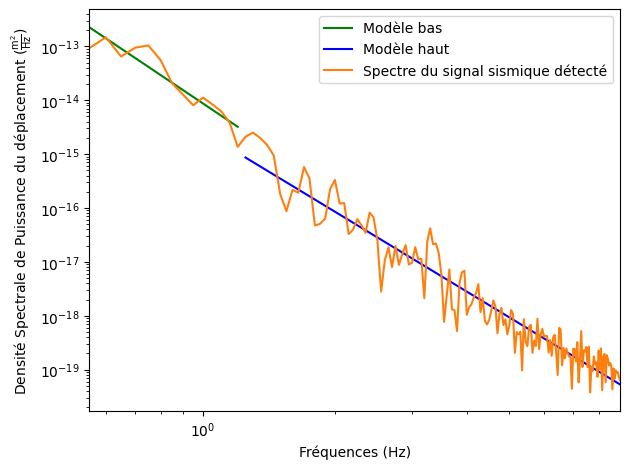

-------------------------
Event number 27
-------------------------
The distance of the trace is 71.03478628398895
Detection on trace 0


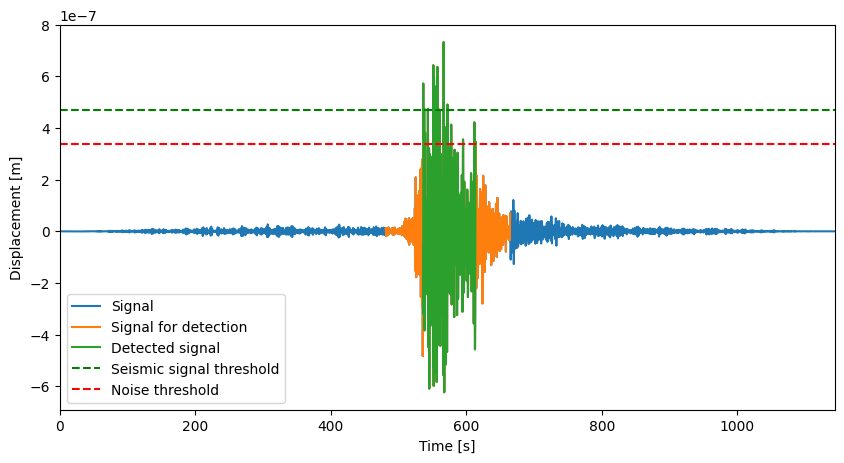

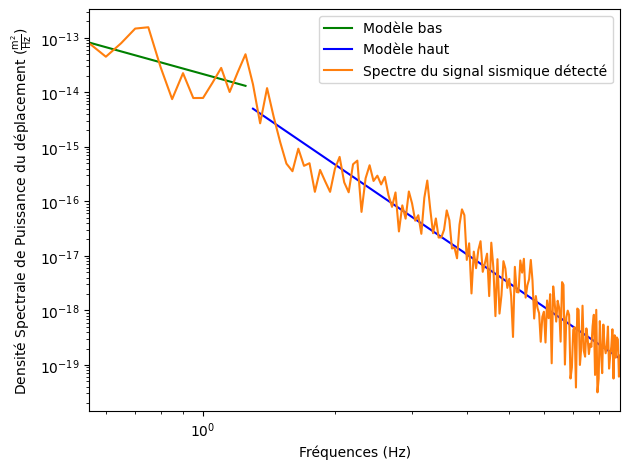

-------------------------
Event number 28
-------------------------
The distance of the trace is 46.94814284832026
Detection on trace 0


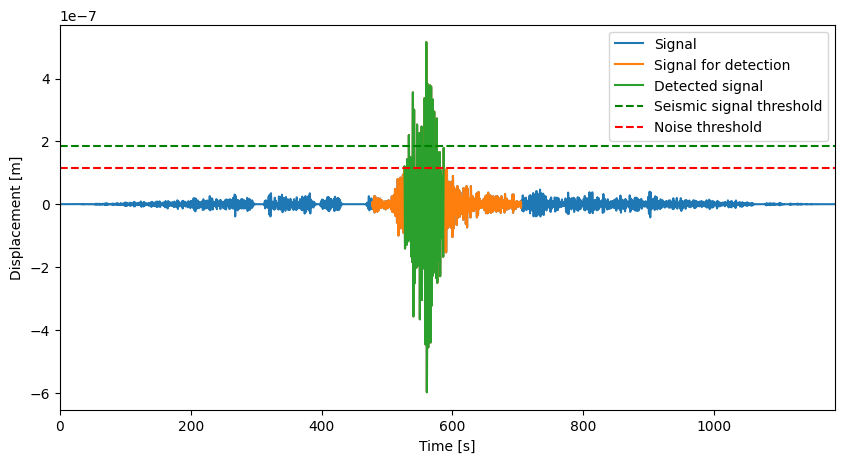

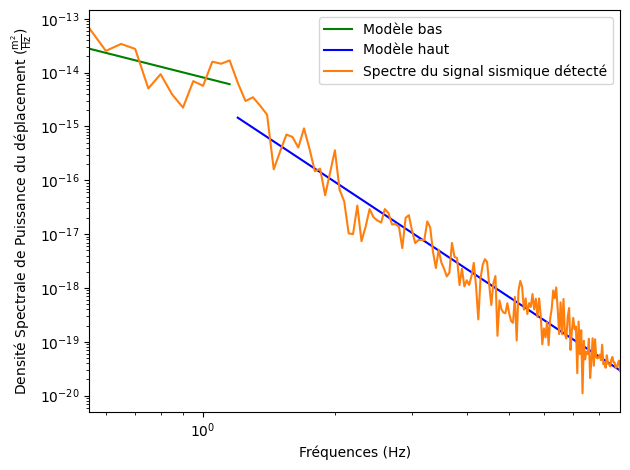

-------------------------
Event number 32
-------------------------
The distance of the trace is 15.753280920469651
Detection on trace 0


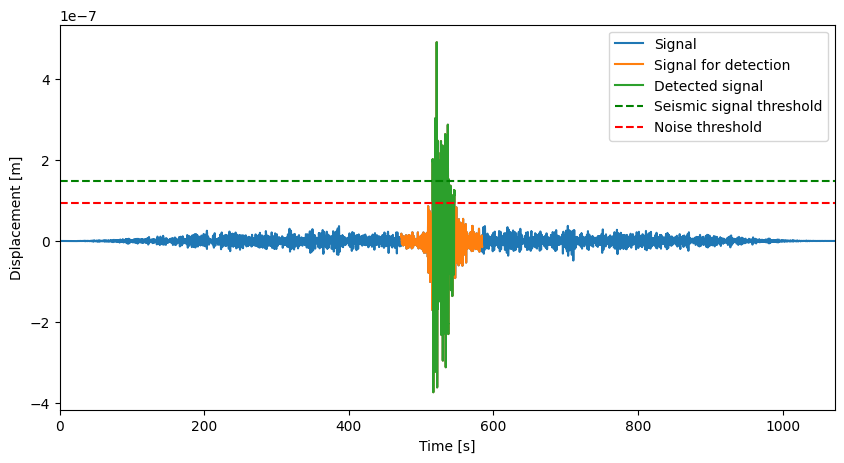

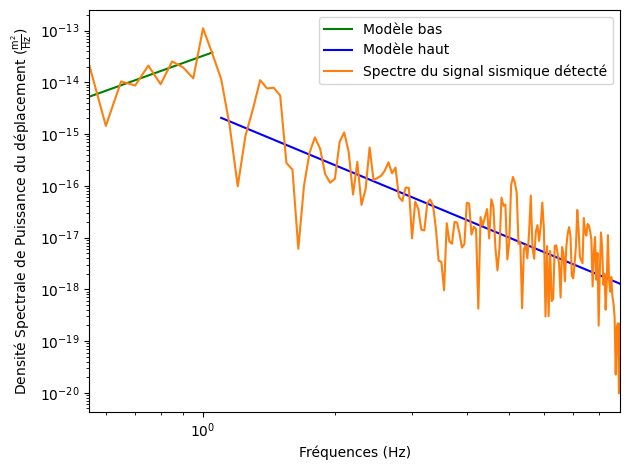

-------------------------
Event number 36
-------------------------
The distance of the trace is 12.03527266793596
Detection on trace 0


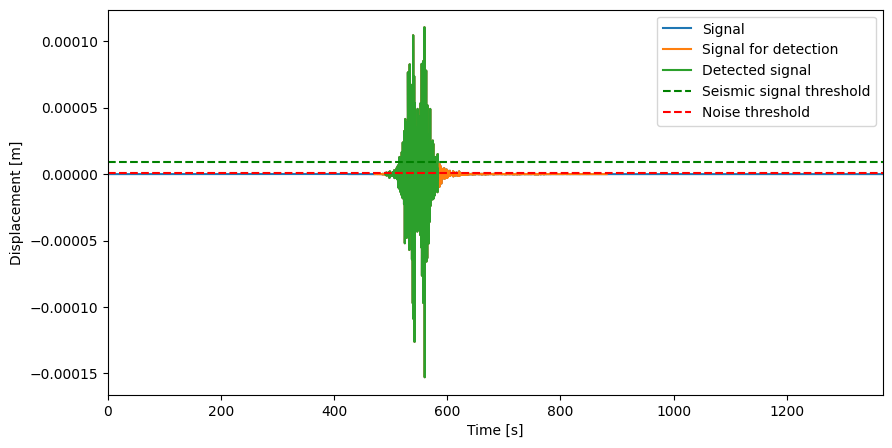

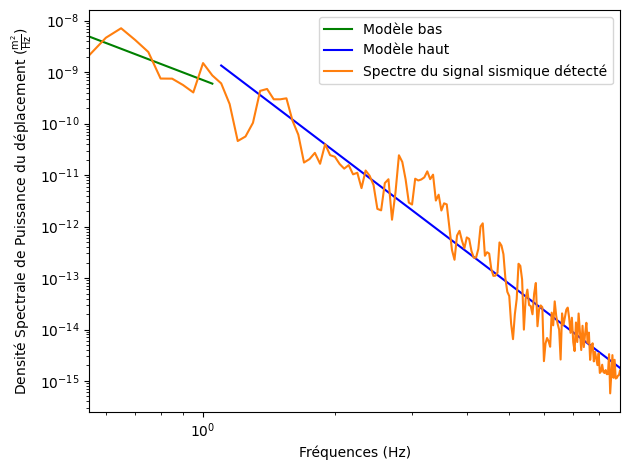

-------------------------
Event number 37
-------------------------
The distance of the trace is 15.002437637969912
Detection on trace 0


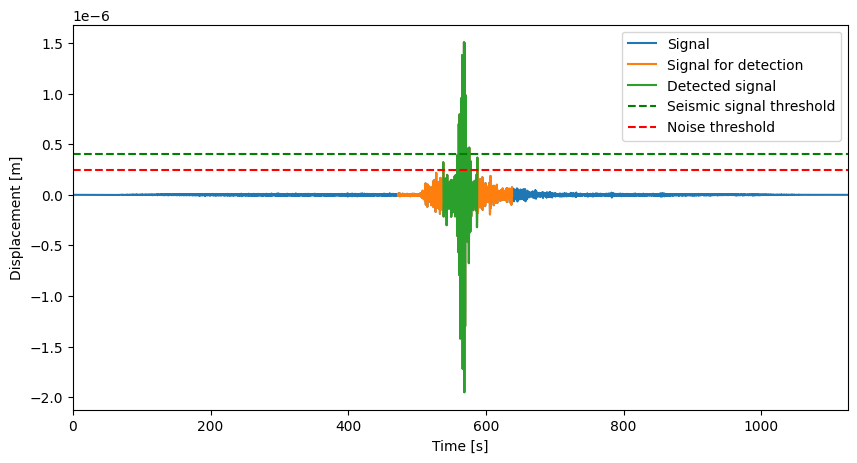

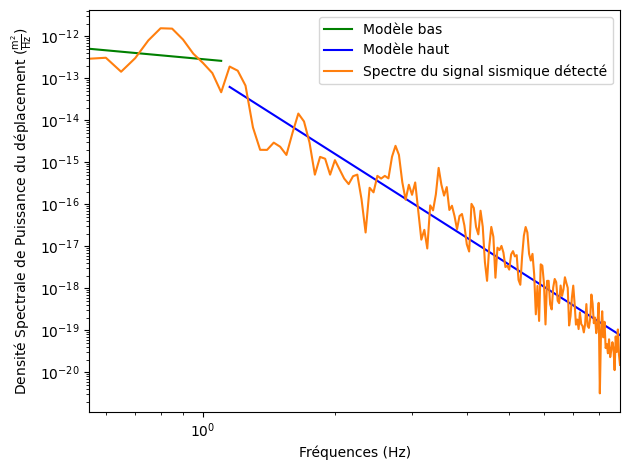

-------------------------
Event number 38
-------------------------
The distance of the trace is 35.32501028979229
Detection on trace 0


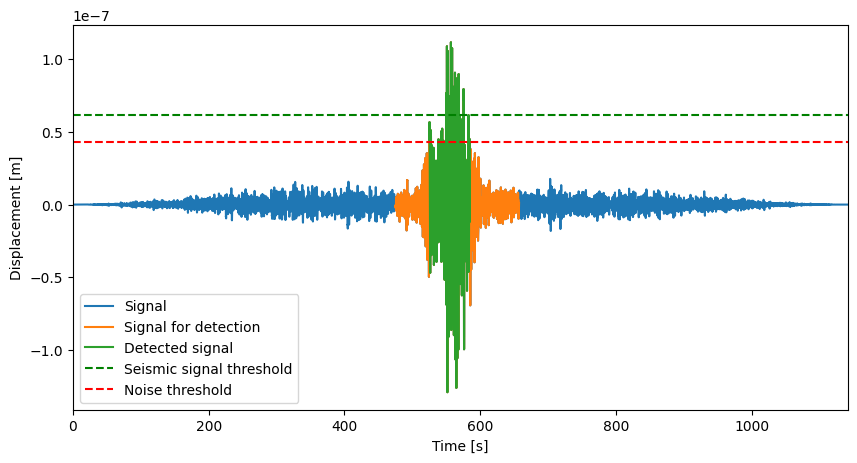

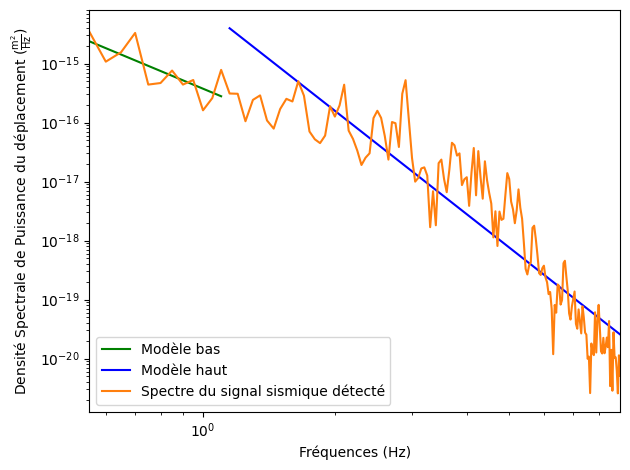

-------------------------
Event number 39
-------------------------
The distance of the trace is 24.47873020467683
Detection on trace 0


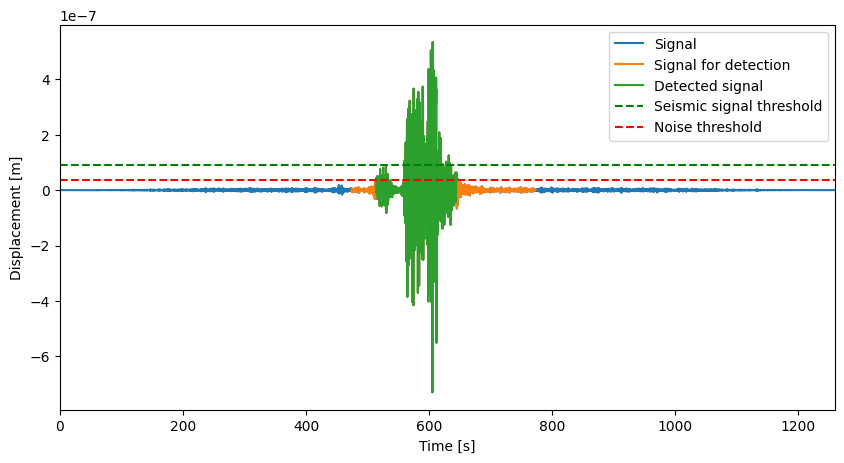

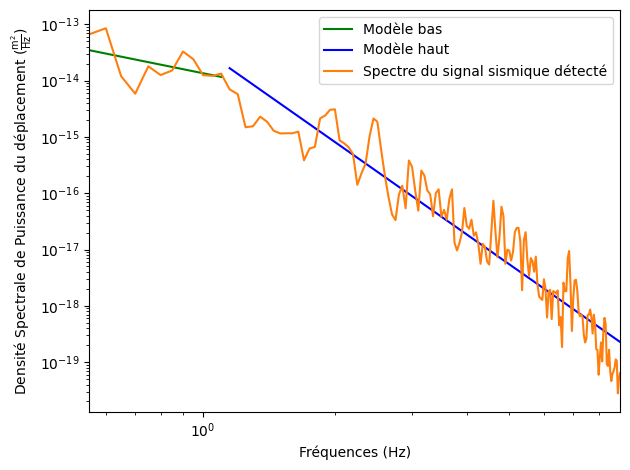

-------------------------
Event number 40
-------------------------
The distance of the trace is 48.81039753705775
Detection on trace 0


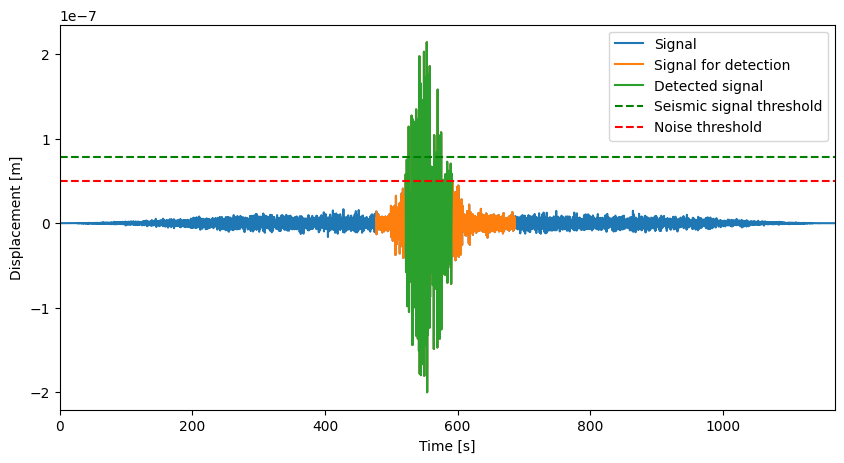

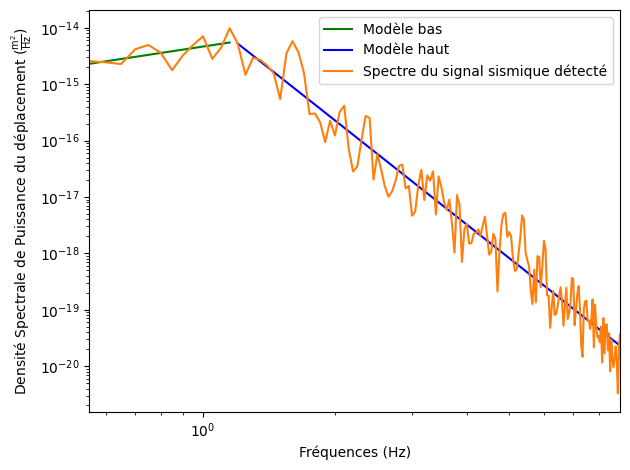

-------------------------
Event number 41
-------------------------
The distance of the trace is 10.939019253784037
Detection on trace 0


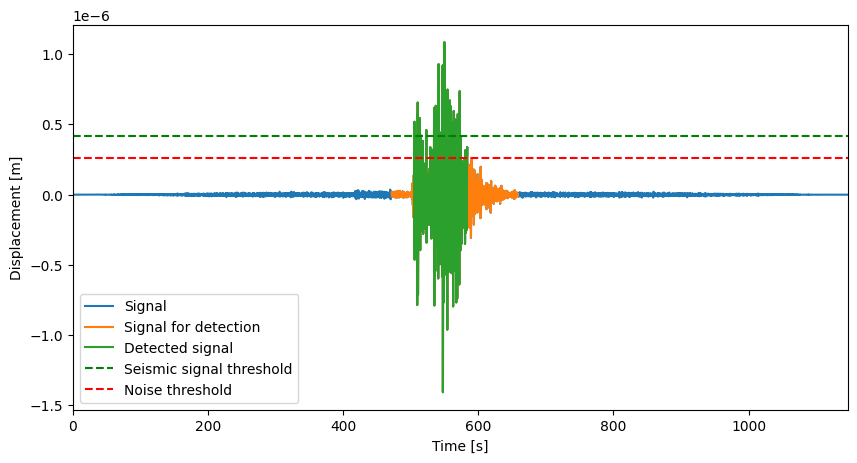

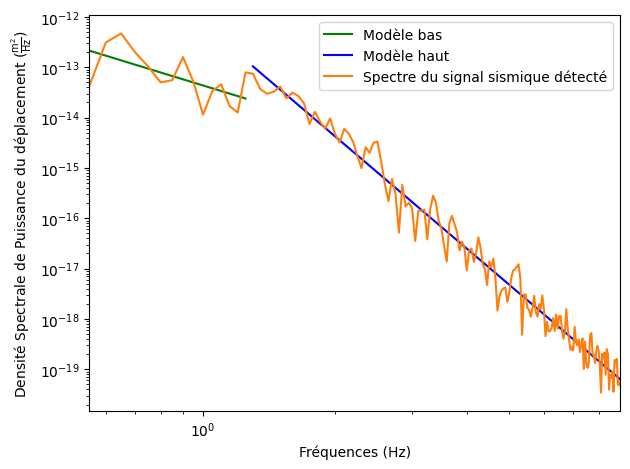

-------------------------
Event number 42
-------------------------
The distance of the trace is 69.66579433857272
Detection on trace 0


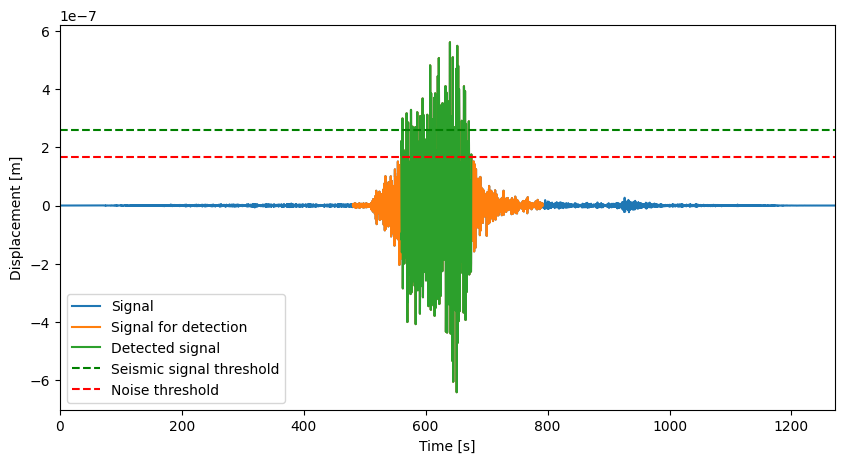

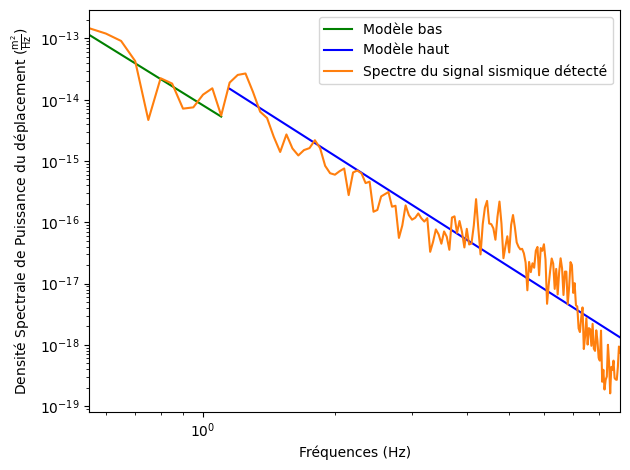

-------------------------
Event number 43
-------------------------
The distance of the trace is 374.1234855626473
Detection on trace 0


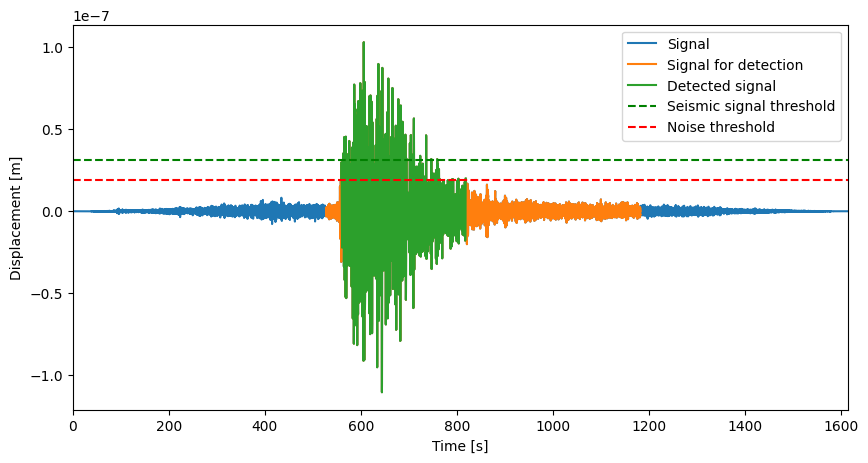

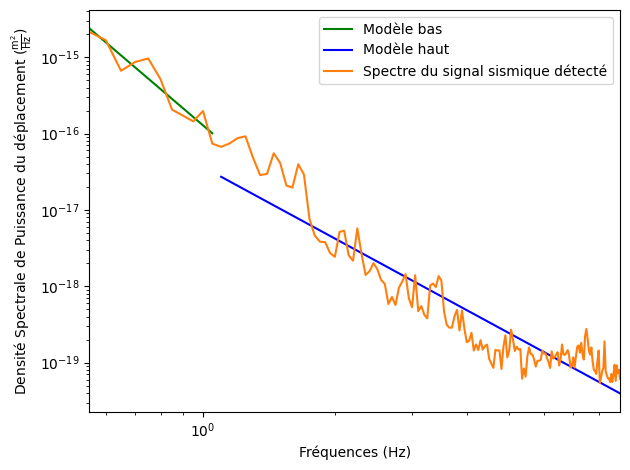

-------------------------
Event number 46
-------------------------
The distance of the trace is 28.39509627026777
Detection on trace 0


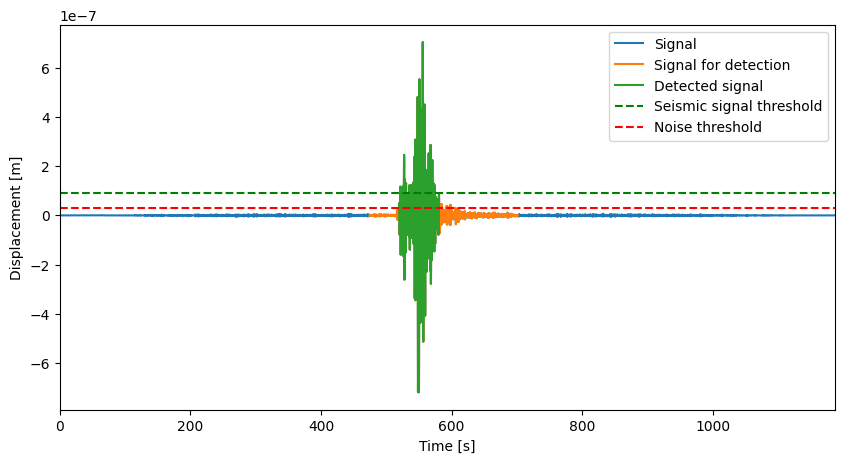

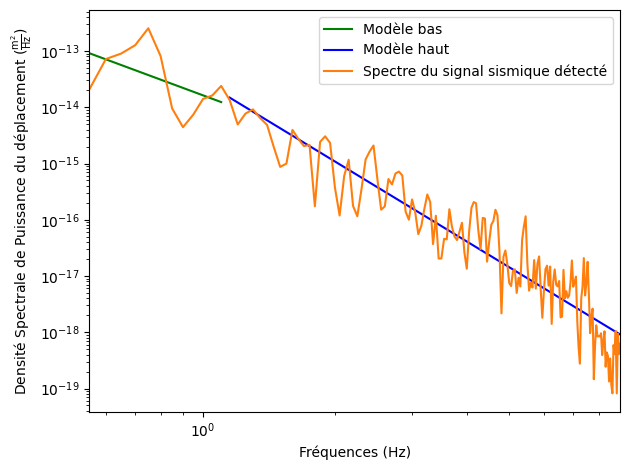

-------------------------
Event number 47
-------------------------
The distance of the trace is 65.4712195650786
Detection on trace 0


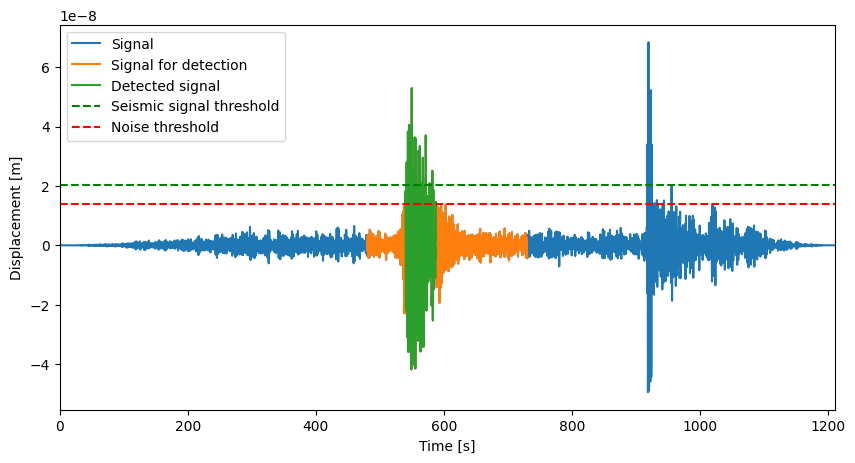

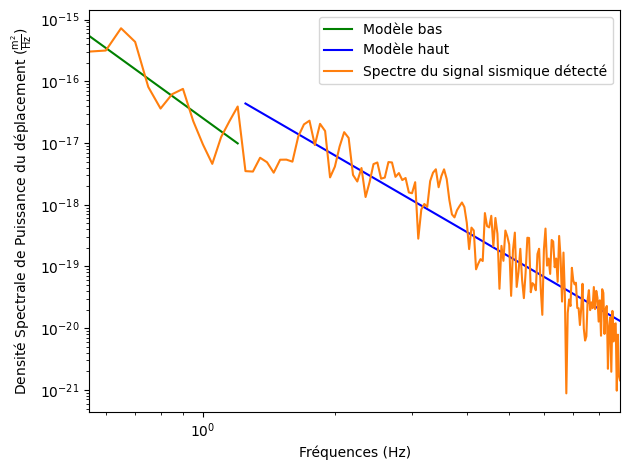

-------------------------
Event number 48
-------------------------
The distance of the trace is 13.722433101857618
Detection on trace 0


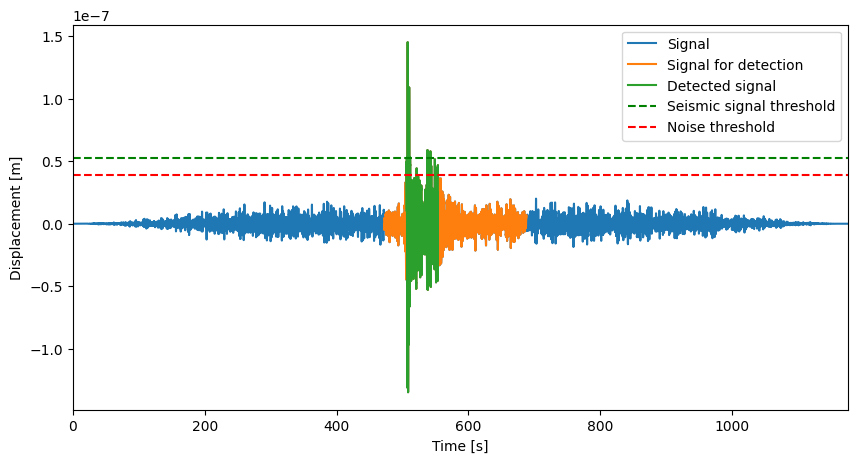

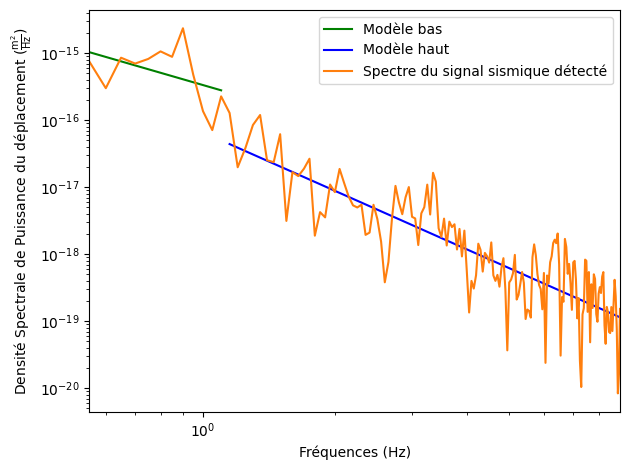

-------------------------
Event number 49
-------------------------
The distance of the trace is 46.29233658345037
Detection on trace 0


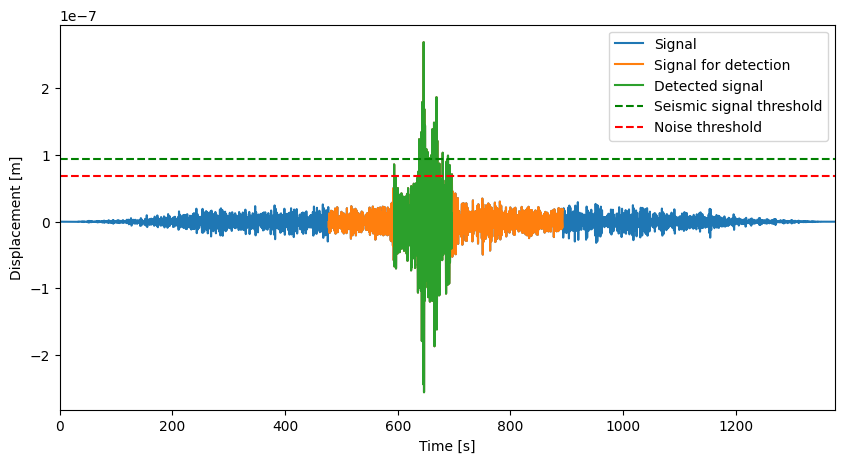

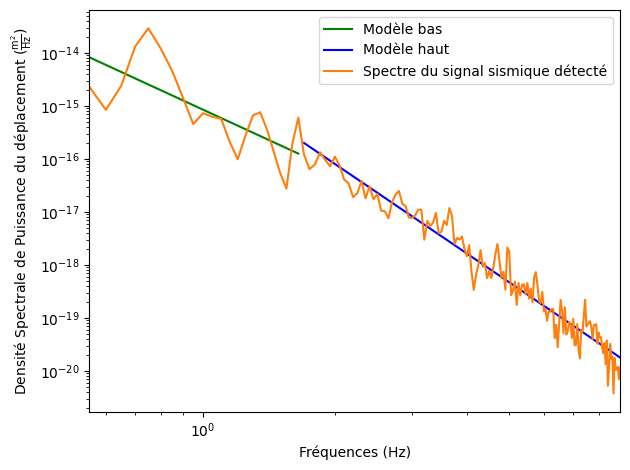

-------------------------
Event number 50
-------------------------
The distance of the trace is 8.02712459816291
Detection on trace 0


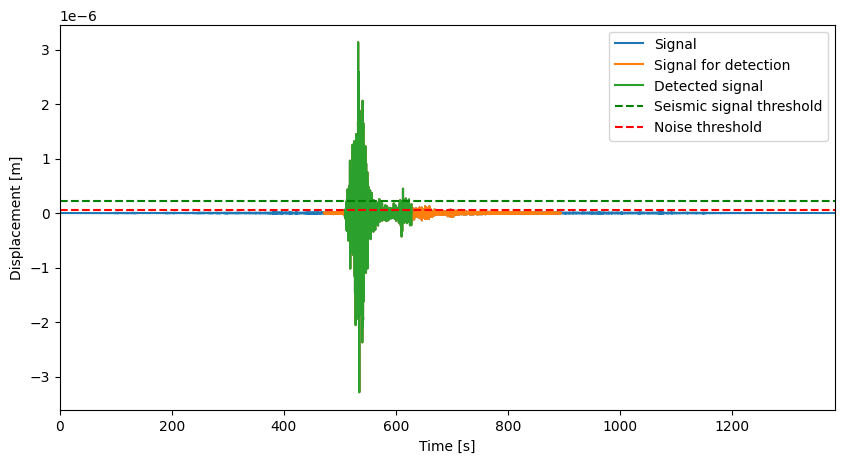

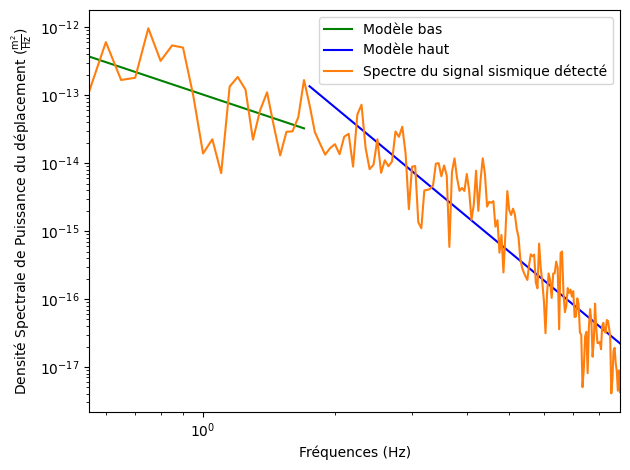

-------------------------
Event number 53
-------------------------
The distance of the trace is 51.02335286912581
Detection on trace 0


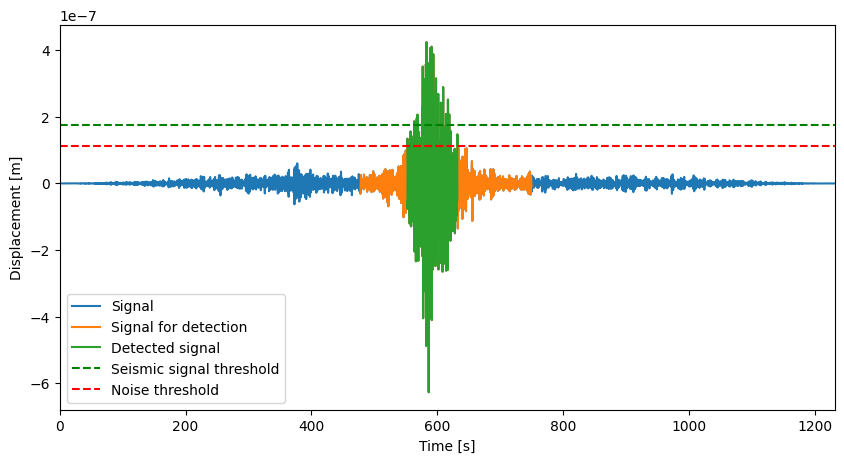

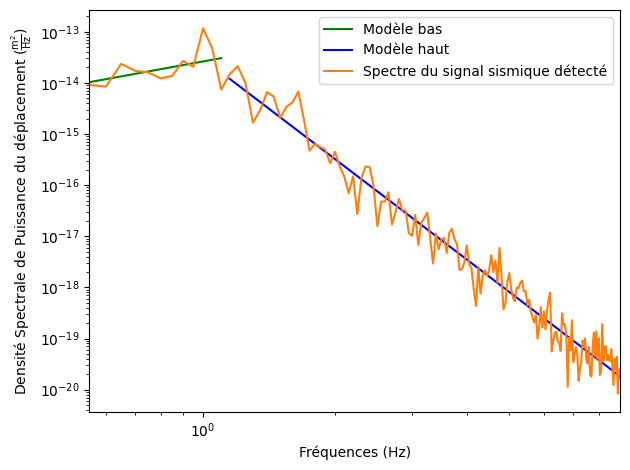

-------------------------
Event number 57
-------------------------
The distance of the trace is 41.331622923491686
Detection on trace 0


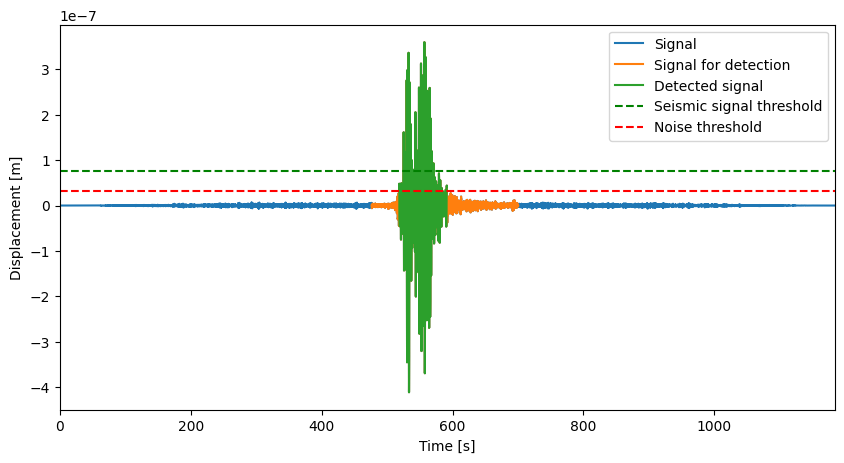

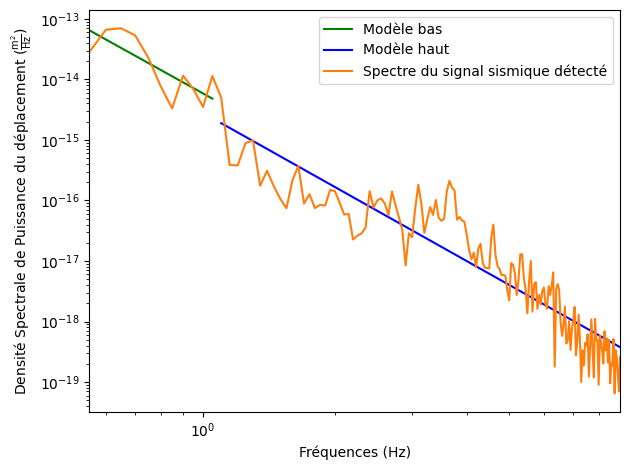

-------------------------
Event number 60
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


The distance of the trace is 27.701041735397084
Detection on trace 0


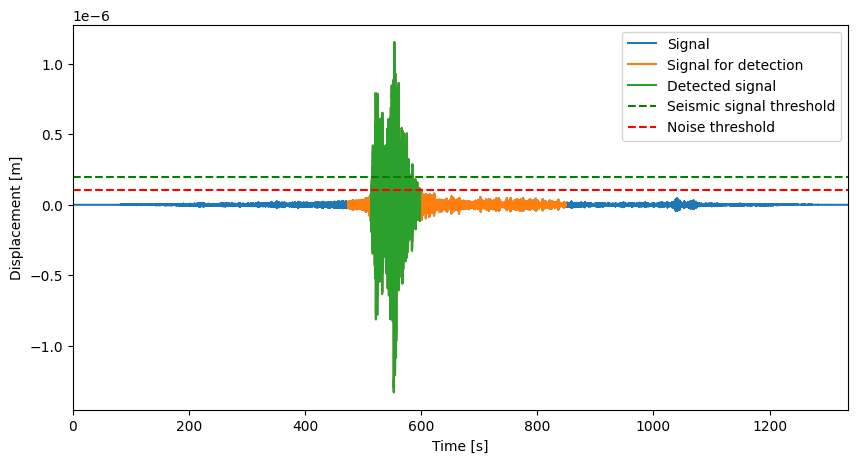

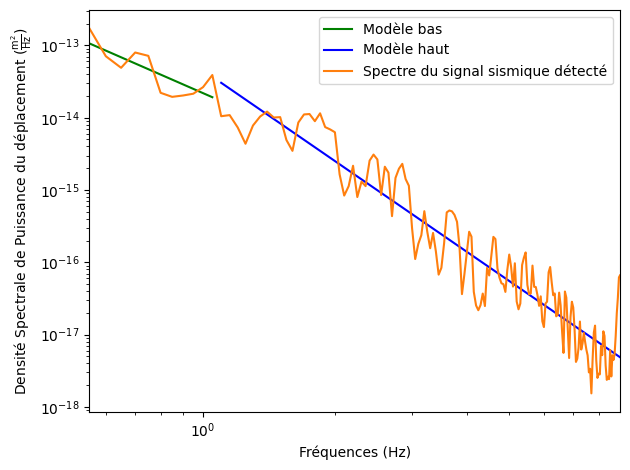

-------------------------
Event number 62
-------------------------
The distance of the trace is 13.62326614267406
Detection on trace 0


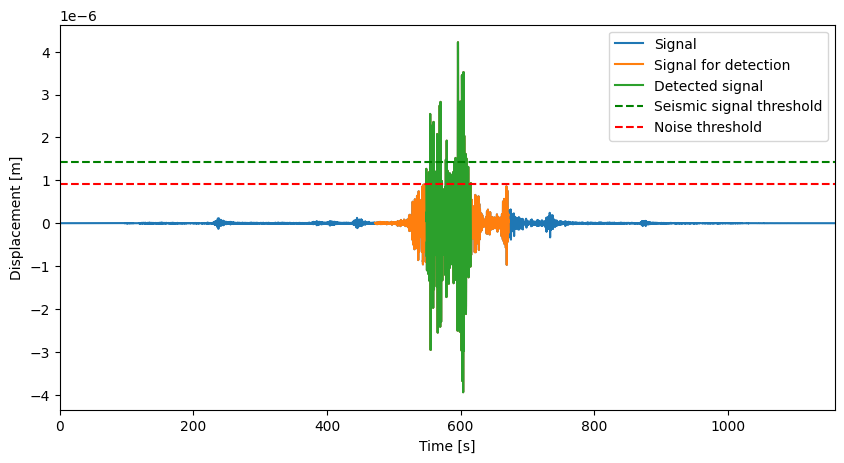

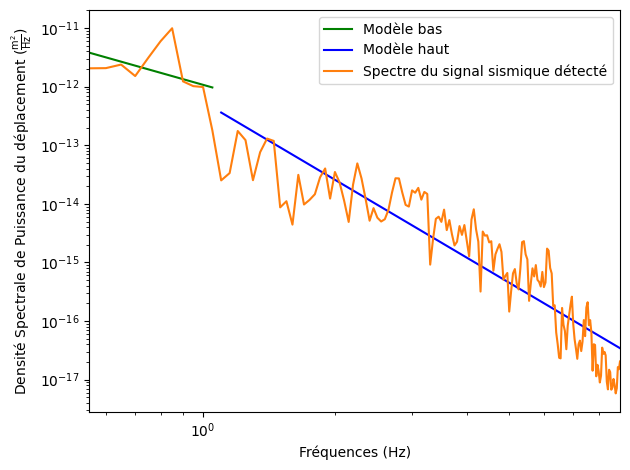

-------------------------
Event number 67
-------------------------
The distance of the trace is 13.62326614267406
Detection on trace 0


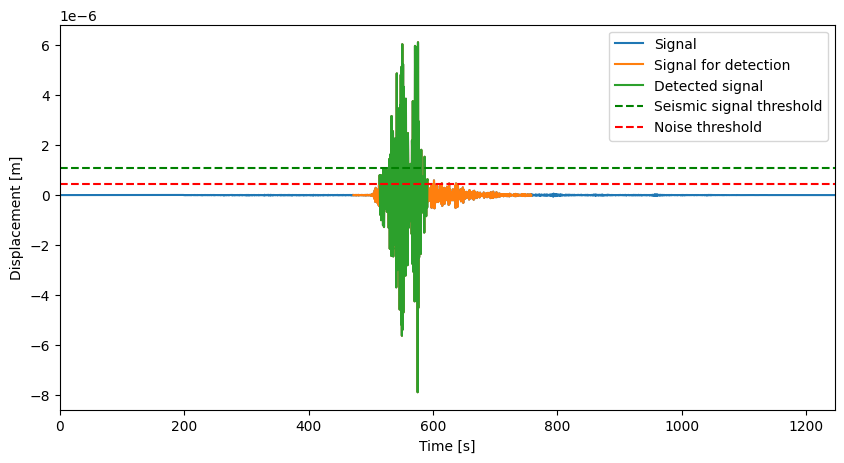

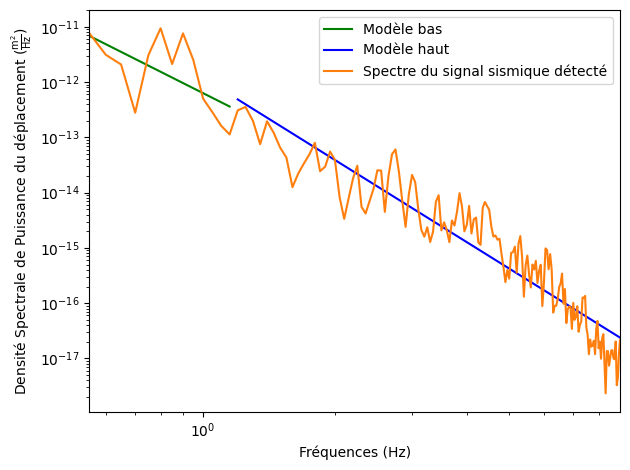

-------------------------
Event number 72
-------------------------
The distance of the trace is 26.476790947195617
Detection on trace 0


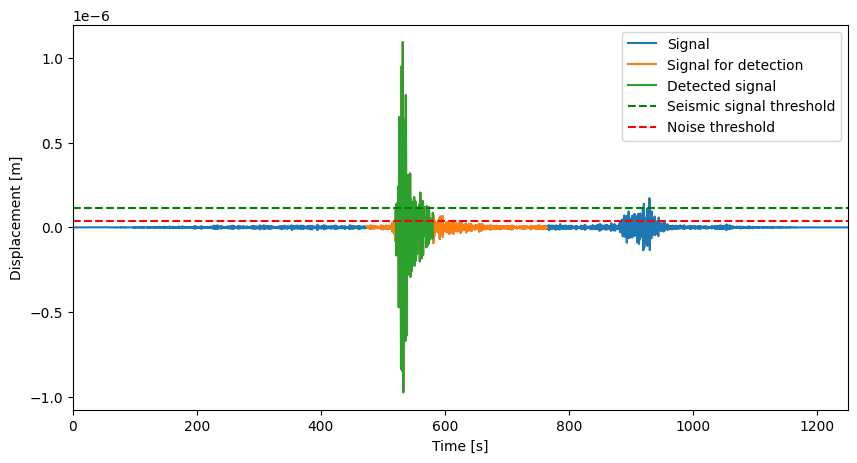

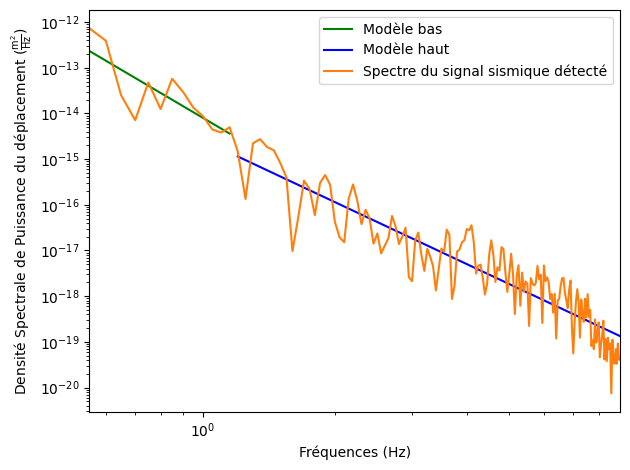

-------------------------
Event number 78
-------------------------
The distance of the trace is 15.019977789948488
Detection on trace 0


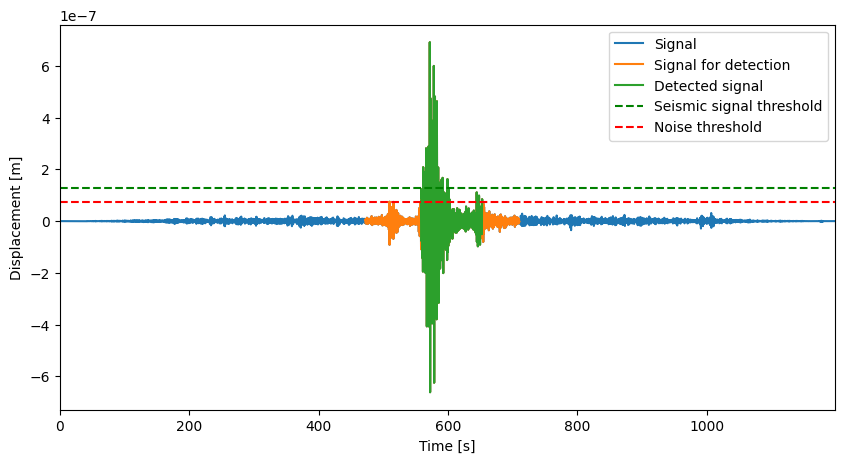

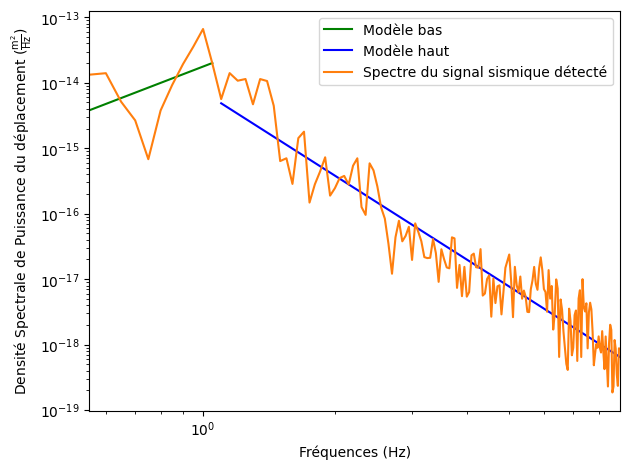

-------------------------
Event number 80
-------------------------
The distance of the trace is 86.32450135395642
Detection on trace 0


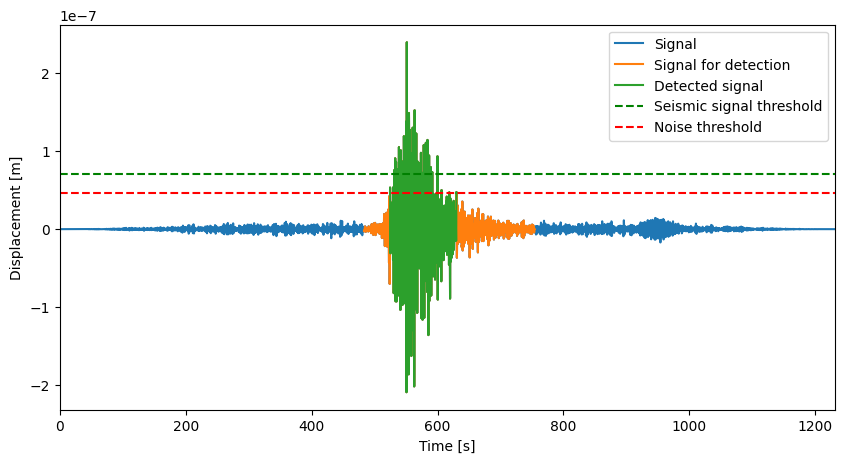

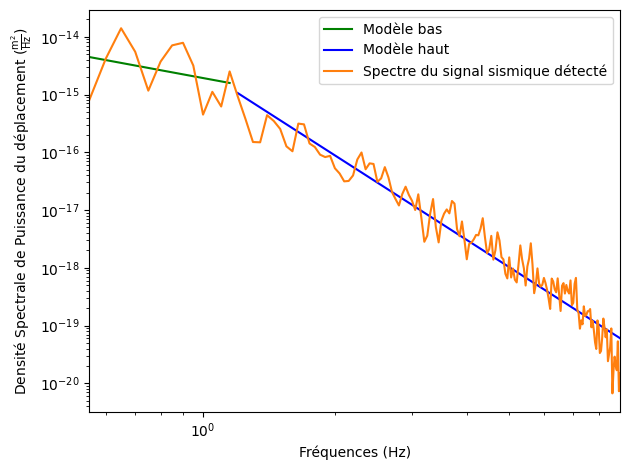

-------------------------
Event number 81
-------------------------
The distance of the trace is 21.17416556830685
Detection on trace 0


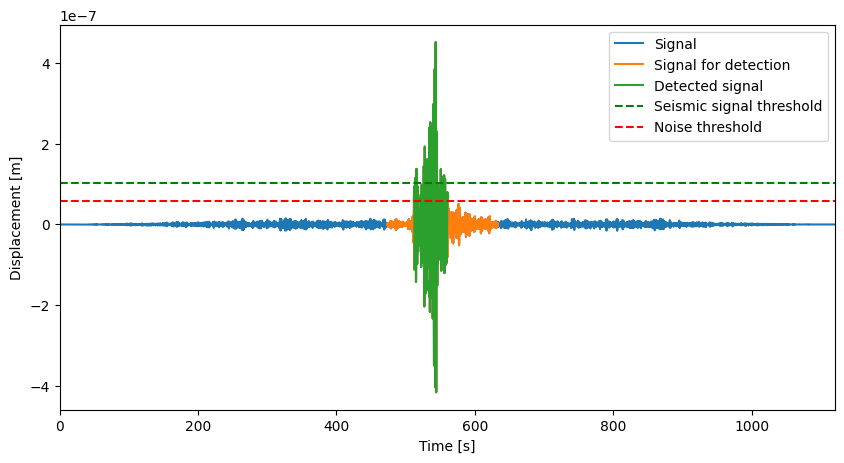

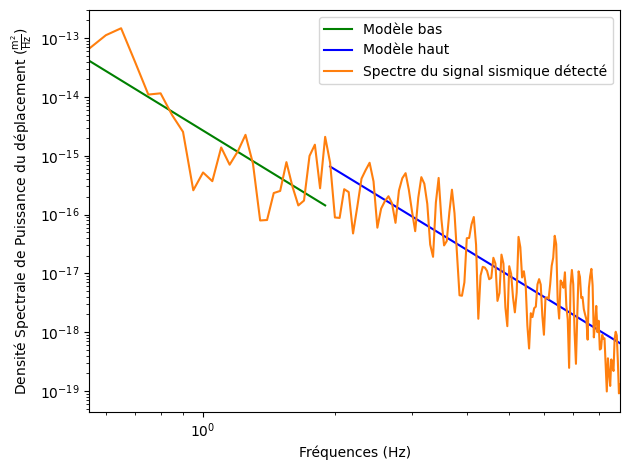

-------------------------
Event number 85
-------------------------
The distance of the trace is 95.81345025290146
Detection on trace 0


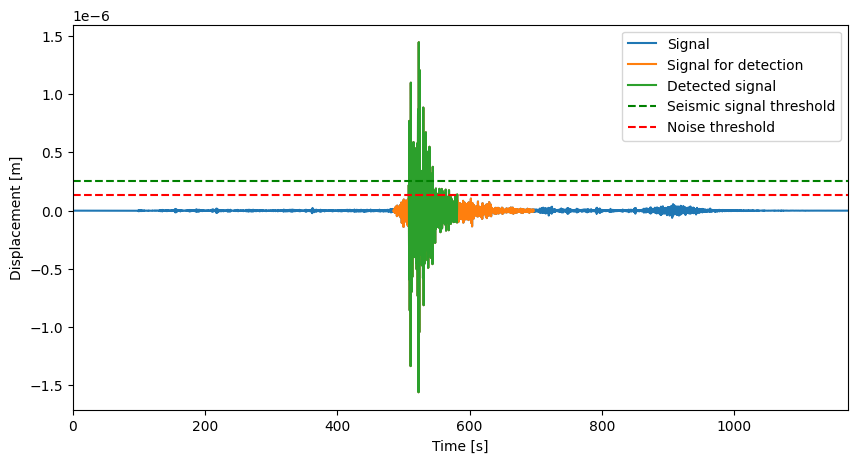

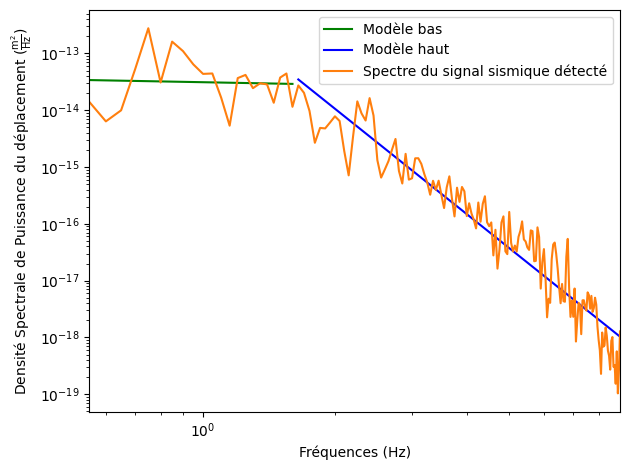

-------------------------
Event number 87
-------------------------
The distance of the trace is 78.54479063173196
Detection on trace 0


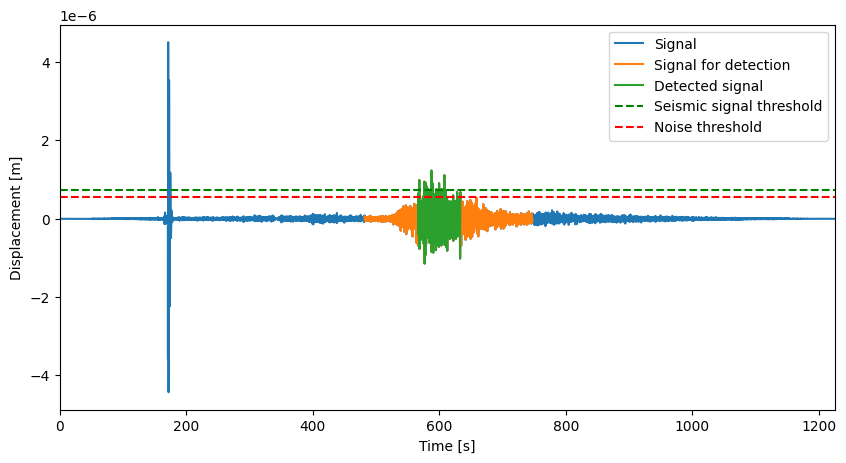

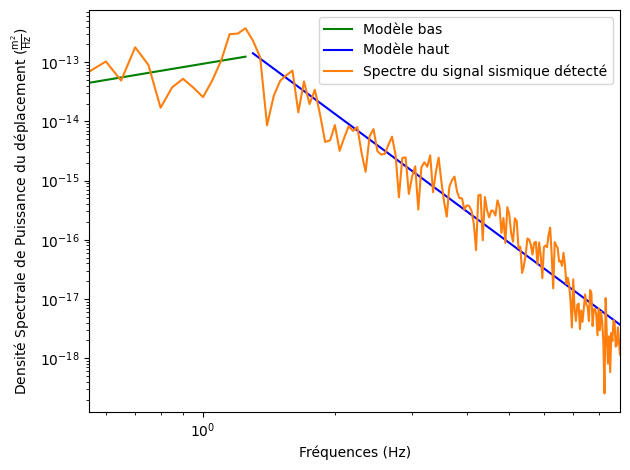

In [3]:
## Loop over all the events
for event_index in tqdm(ESEC_avalanches["numero"], total=len(ESEC_avalanches)):
        
    #if event_index == 8: ## Uncomment this line if you want to see a specific event

        print("-------------------------")
        print("Event number", event_index)
        print("-------------------------")
        
        ## Filter the stream
        _, stream, trace = analysis.filter_stream(ESEC_avalanches, event_index, 0, freq_HP=9, freq_LP=0.5, max_percentage=0.3)

        ## The detection method
        time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold, _ = analysis.detection_on_one_trace(trace, ESEC_avalanches, event_index, 0, -30, 10, detection_yes_or_no=[])        
        
        ## Plot the signal
        figures.plot_detected_signal(time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold)
        plt.show()

        ## Plot the spectrum with the models and extract features in a dataframe
        analysis.plot_spectre(trace, ESEC_avalanches, trimmed_data, 0, event_index, conserv_result=True)
        plt.show()